# Taller de Automatización de Procesos con Python

## Introducción a Basemap

### GitHub repository: https://github.com/jorgemauricio/automatizacion_python

### Instructor: Jorge Mauricio

### Instalación

##### Normal

`conda install -c anaconda basemap`

##### Alta resolución

`conda install -c conda-forge basemap-data-hires`

Basemap es una librería open source que nos permite generar mapas con calidad de impresión, para mayor información: http://basemaptutorial.readthedocs.io/en/latest/#

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
# leer csv
df = pd.read_csv("data/estado1_5.csv")

In [3]:
# estructura del csv
df.head()

,numero,fecha,nombre,latitud,longitud,prec,tmax,tmin,tmed,velvmax,velv,dirv,radg,humr,ff
0,2,2018-05-01 00:00:00,La Mirinda,22.248528,-102.251778,0.0,30.0,8.2,20.56,17.4,9.01,163.1,429.81,33.47,2018-05-01
1,2,2018-05-02 00:00:00,La Mirinda,22.248528,-102.251778,0.2,31.4,13.0,21.94,15.6,7.26,161.1,450.76,41.72,2018-05-02
2,2,2018-05-03 00:00:00,La Mirinda,22.248528,-102.251778,0.6,31.2,13.9,20.05,20.3,4.49,159.7,349.13,64.67,2018-05-03
3,2,2018-05-04 00:00:00,La Mirinda,22.248528,-102.251778,1.6,30.5,14.7,21.01,6.3,3.45,98.9,375.06,64.73,2018-05-04
4,2,2018-05-05 00:00:00,La Mirinda,22.248528,-102.251778,2.8,29.4,13.5,19.72,9.7,3.52,12.7,442.23,71.00,2018-05-05


In [4]:
# Agrupar los datos por numero de estación
grouped = df.groupby("numero").mean()[['latitud','longitud']]

In [5]:
# visualizar la estructura de datos
grouped

,latitud,longitud
numero,,
2,22.248528,-102.251778
22,21.785300,-102.263886
13466,21.780389,-102.128306
13467,22.123361,-102.254778
13468,21.816717,-102.362917
13470,22.054278,-102.294639
13471,22.217667,-102.274917
13472,21.755139,-102.315000
13473,22.320333,-102.225167


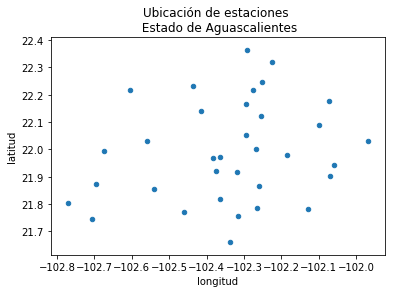

In [6]:
# mapeo de estaciones
grouped.plot(x="longitud",y='latitud', kind="scatter", title="Ubicación de estaciones \n Estado de Aguascalientes")

In [7]:
# límites del Estado de Aguascalientes
LONG_MIN = -102.9339
LONG_MAX = -101.7861
LAT_MIN  = 21.5155
LAT_MAX  = 22.5794

In [8]:
# latitud y longitud de cada una de las estaciones
x = np.array(grouped['longitud'])
y = np.array(grouped['latitud'])

In [9]:
# crear el objeto de mapa
"""
projection:
cyl:       Cylindrical Equidistant
mill:      Miller Cylindrical
stere:     Stereographic
geos:      Geostationary

resolution:
c:        crude
l:        low
i:        intermediate
h:        high
f:        full

llcrnrlat:    latitud del lado inferior izquierdo del mapa
urcrnrlat:    latitud del lado superior derecho del mapa
llcrnrlon:    longitud del lado inferior izquierdo del mapa
urcrnrlon:    longitud del lado superior derecho del mapa
""" 

m = Basemap(projection='mill', 
            resolution='l',
            llcrnrlat=LAT_MIN,
            urcrnrlat=LAT_MAX,
            llcrnrlon=LONG_MIN,
            urcrnrlon=LONG_MAX)

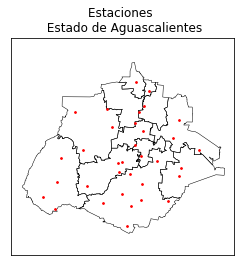

In [10]:
# agregar los puntos de las estaciones al mapa
m.scatter(x,y, latlon=True, s=3, marker="o", color='r', zorder=5)

# agregar el archivo shape del estado
# el archivo shape debe de terner una proyección WGS84 para ser compatible con mill
m.readshapefile('/Users/jorgemauricio/Documents/Research/automatizacion_python/shapes/MunicipiosAgs', 'MunicipiosAgs')

# agregar título al mapa
plt.title("Estaciones \n Estado de Aguascalientes")

# guardar el mapa
# título
titulo_mapa = "maps/estaciones_ags.png"
# resolución
res = 300
plt.savefig(titulo_mapa, dpi=res, bbox_inches='tight')

### Temperatura Máxima por Estación
Mapeo de la temperatura máxima para el día 1 de mayo de 2018

In [11]:
# filtrar la información al 1 de mayo de 2018
df_analisis = df.where(df['ff'] == "2018-05-01").dropna()

In [12]:
# agrupar la información por estación
# Agrupar los datos por numero de estación
grouped = df.groupby("numero").mean()[['latitud','longitud','tmax']]

In [13]:
# latitud, longitud y valor de temperatura máxima de cada una de las estaciones
x = np.array(grouped['longitud'])
y = np.array(grouped['latitud'])
z = np.array(grouped['tmax'])

In [14]:
# crear el objeto de mapa
"""
projection:
cyl:       Cylindrical Equidistant
mill:      Miller Cylindrical
stere:     Stereographic
geos:      Geostationary

resolution:
c:        crude
l:        low
i:        intermediate
h:        high
f:        full

llcrnrlat:    latitud del lado inferior izquierdo del mapa
urcrnrlat:    latitud del lado superior derecho del mapa
llcrnrlon:    longitud del lado inferior izquierdo del mapa
urcrnrlon:    longitud del lado superior derecho del mapa
""" 

m = Basemap(projection='mill', 
            resolution='l',
            llcrnrlat=LAT_MIN,
            urcrnrlat=LAT_MAX,
            llcrnrlon=LONG_MIN,
            urcrnrlon=LONG_MAX)

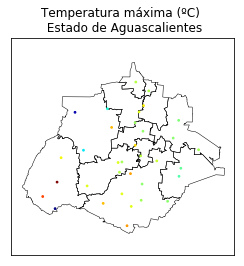

In [15]:
# agregar los puntos de las estaciones al mapa
m.scatter(x,y, latlon=True, s=3, c=z, cmap='jet', zorder=5)

# agregar el archivo shape del estado
# el archivo shape debe de terner una proyección WGS84 para ser compatible con mill
m.readshapefile('/Users/jorgemauricio/Documents/Research/automatizacion_python/shapes/MunicipiosAgs', 'MunicipiosAgs')

# agregar título al mapa
plt.title("Temperatura máxima (ºC) \n Estado de Aguascalientes")

# guardar el mapa
# título
titulo_mapa = "maps/estaciones_tmax_ags.png"
# resolución
res = 300
plt.savefig(titulo_mapa, dpi=res, bbox_inches='tight')

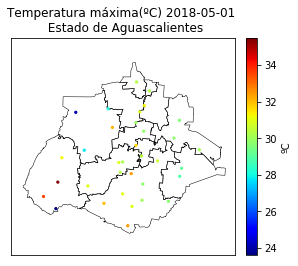

In [16]:
# agregar los puntos de las estaciones al mapa
cs = m.scatter(x,y, latlon=True, s=5, c=z, cmap='jet', zorder=5)

# agregar el archivo shape del estado
# el archivo shape debe de terner una proyección WGS84 para ser compatible con mill
m.readshapefile('/Users/jorgemauricio/Documents/Research/automatizacion_python/shapes/MunicipiosAgs', 'MunicipiosAgs')

# agregar barra de color
cbar = m.colorbar(cs, location='right', pad="5%")

# agregar simbolo
cbar.set_label("ºC")

# agregar título al mapa
plt.title("Temperatura máxima(ºC) 2018-05-01 \n Estado de Aguascalientes")

# guardar el mapa
# título
titulo_mapa = "maps/estaciones_tmax_ags.png"
# resolución
res = 300
plt.savefig(titulo_mapa, dpi=res, bbox_inches='tight')

### Mapa con grid

In [17]:
# importar librería de intepolación
from scipy.interpolate import griddata as gd

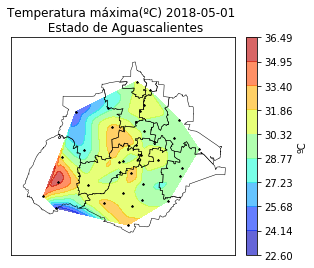

In [18]:
# crear el objeto de mapa
"""
projection:
cyl:       Cylindrical Equidistant
mill:      Miller Cylindrical
stere:     Stereographic
geos:      Geostationary

resolution:
c:        crude
l:        low
i:        intermediate
h:        high
f:        full

llcrnrlat:    latitud del lado inferior izquierdo del mapa
urcrnrlat:    latitud del lado superior derecho del mapa
llcrnrlon:    longitud del lado inferior izquierdo del mapa
urcrnrlon:    longitud del lado superior derecho del mapa
""" 

m = Basemap(projection='mill', 
            resolution='l',
            llcrnrlat=LAT_MIN,
            urcrnrlat=LAT_MAX,
            llcrnrlon=LONG_MIN,
            urcrnrlon=LONG_MAX)

# generar los valores de latitud y longitud
lons, lats = m(x,y)

# generar los valores mínimos y máximos de latitud y longitud
pixels = 1000

xi = np.linspace(lons.min(), lons.max(), pixels)
yi = np.linspace(lats.min(), lats.max(), pixels)

xi, yi = np.meshgrid(xi,yi)

# generar los valores para z
zi = gd((lons,lats), z, (xi,yi), method='cubic')

# generar el rango de colores
clevs = np.linspace(z.min()-1, z.max()+1, 10)

# generar la gráfica de contornos
cs = m.contourf(xi,yi,zi, clevs, zorder=0, alpha=0.6, cmap='jet')

# agregar los puntos de las estaciones al mapa
m.scatter(x,y, latlon=True, s=3, color='k', marker='*',zorder=5)

# agregar el archivo shape del estado
# el archivo shape debe de terner una proyección WGS84 para ser compatible con mill
m.readshapefile('/Users/jorgemauricio/Documents/Research/automatizacion_python/shapes/MunicipiosAgs', 'MunicipiosAgs')

# agregar barra de color
cbar = m.colorbar(cs, location='right', pad="5%")

# agregar simbolo
cbar.set_label("ºC")

# agregar título al mapa
plt.title("Temperatura máxima(ºC) 2018-05-01 \n Estado de Aguascalientes")

# guardar el mapa
# título
titulo_mapa = "maps/estaciones_gradiente_tmax_ags.png"

# resolución
res = 300
plt.savefig(titulo_mapa, dpi=res, bbox_inches='tight')

### Agregar escala al mapa

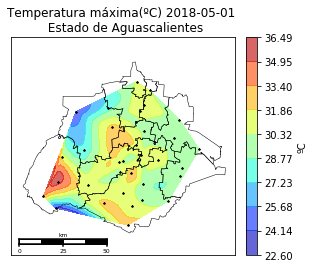

In [19]:
# crear el objeto de mapa
"""
projection:
cyl:       Cylindrical Equidistant
mill:      Miller Cylindrical
stere:     Stereographic
geos:      Geostationary

resolution:
c:        crude
l:        low
i:        intermediate
h:        high
f:        full

llcrnrlat:    latitud del lado inferior izquierdo del mapa
urcrnrlat:    latitud del lado superior derecho del mapa
llcrnrlon:    longitud del lado inferior izquierdo del mapa
urcrnrlon:    longitud del lado superior derecho del mapa
""" 

m = Basemap(projection='mill', 
            resolution='l',
            llcrnrlat=LAT_MIN,
            urcrnrlat=LAT_MAX,
            llcrnrlon=LONG_MIN,
            urcrnrlon=LONG_MAX)

# generar los valores de latitud y longitud
lons, lats = m(x,y)

# generar los valores mínimos y máximos de latitud y longitud
pixels = 1000

xi = np.linspace(lons.min(), lons.max(), pixels)
yi = np.linspace(lats.min(), lats.max(), pixels)

xi, yi = np.meshgrid(xi,yi)

# generar los valores para z
zi = gd((lons,lats), z, (xi,yi), method='cubic')

# generar el rango de colores
clevs = np.linspace(z.min()-1, z.max()+1, 10)

# generar la gráfica de contornos
cs = m.contourf(xi,yi,zi, clevs, zorder=0, alpha=0.6, cmap='jet')

# agregar los puntos de las estaciones al mapa
m.scatter(x,y, latlon=True, s=3, color='k', marker='*',zorder=5)

# agregar el archivo shape del estado
# el archivo shape debe de terner una proyección WGS84 para ser compatible con mill
m.readshapefile('/Users/jorgemauricio/Documents/Research/automatizacion_python/shapes/MunicipiosAgs', 'MunicipiosAgs')

# agregar escala al mapa
x_1 = x.min()+0.1
y_1 = y.min()-0.08

m.drawmapscale(x_1, y_1, x.min(), y.min(), length=50, barstyle='fancy', units='km', fontsize=6, zorder=6)

# agregar barra de color
cbar = m.colorbar(cs, location='right', pad="5%")

# agregar simbolo
cbar.set_label("ºC")

# agregar título al mapa
plt.title("Temperatura máxima(ºC) 2018-05-01 \n Estado de Aguascalientes")

# guardar el mapa
# título
titulo_mapa = "maps/estaciones_gradiente_escala_tmax_ags.png"

# resolución
res = 300
plt.savefig(titulo_mapa, dpi=res, bbox_inches='tight')

# Realiza un ciclo que genere un mapa por día de la tempertura mínima del periodo del 2018-05-05 al 2018-05-10